<a href="https://colab.research.google.com/github/akhileshgrandhi/MAT-421/blob/main/MAT_421_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE FOR MAT 421 PROJECT


In [2]:
from google.colab import files

uploaded = files.upload()


Saving MSFT.csv to MSFT.csv


In [3]:
# importing the pandas library and reading the csv file

import pandas as pd
Microsoft = pd.read_csv("MSFT.csv")
print(Microsoft)



          Date        Open        High         Low       Close   Adj Close  \
0   2022-04-11  291.790009  292.609985  279.320007  279.829987  277.111450   
1   2022-04-18  278.910004  293.299988  273.380005  274.029999  271.367767   
2   2022-04-25  273.290009  290.980011  270.000000  277.519989  274.823883   
3   2022-05-02  277.709991  290.880005  271.269989  274.730011  272.061005   
4   2022-05-09  270.059998  273.750000  250.020004  261.119995  258.583191   
5   2022-05-16  259.959991  268.329987  246.440002  252.559998  250.106369   
6   2022-05-23  255.490005  273.339996  253.429993  273.239990  271.215668   
7   2022-05-30  272.529999  277.690002  261.600006  270.019989  268.019562   
8   2022-06-06  272.059998  274.179993  252.529999  252.990005  251.115723   
9   2022-06-13  245.110001  255.300003  241.509995  247.649994  245.815262   
10  2022-06-20  250.259995  267.980011  249.509995  267.700012  265.716736   
11  2022-06-27  268.209991  268.299988  252.899994  259.579987  

In [4]:
# to get the number of training days 
print("training days =", Microsoft.shape)

training days = (54, 7)


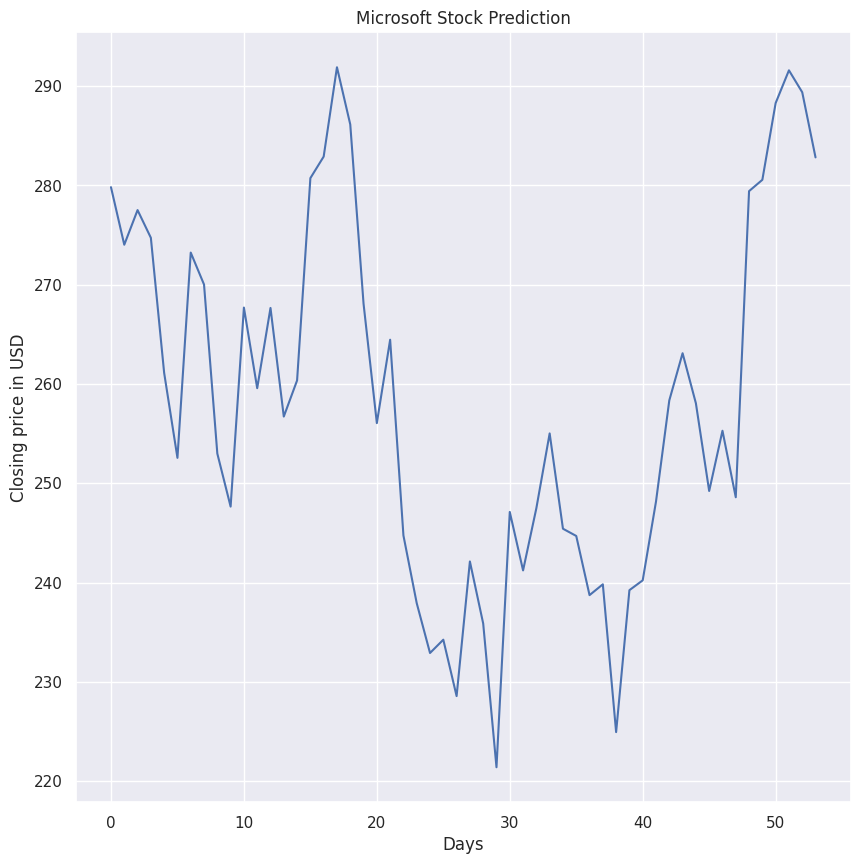

In [5]:
# importing the libraries

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,10))
plt.title("Microsoft Stock Prediction")
plt.xlabel("Days")
plt.ylabel("Closing price in USD")
plt.plot(Microsoft["Close"])
plt.show()

In [6]:
# head and tail functions are used to print the first five and last five observations
Microsoft = Microsoft[["Close"]]
print(Microsoft.head())
print(Microsoft.tail())

        Close
0  279.829987
1  274.029999
2  277.519989
3  274.730011
4  261.119995
         Close
49  280.570007
50  288.299988
51  291.600006
52  289.390015
53  282.829987


In [7]:
# describes the index and data type. We have chosen the Closing Price 
Microsoft.columns 

Index(['Close'], dtype='object')

In [27]:
# noe let us predict the future days
FutureDays = 20
print(FutureDays)

20


In [28]:
Microsoft["Prediction"] = Microsoft["Close"].shift(-FutureDays)
print(Microsoft.head())
print(Microsoft.tail())

        Close  Prediction
0  279.829987  256.059998
1  274.029999  264.459991
2  277.519989  244.740005
3  274.730011  237.919998
4  261.119995  232.899994
         Close  Prediction
49  280.570007         NaN
50  288.299988         NaN
51  291.600006         NaN
52  289.390015         NaN
53  282.829987         NaN


In [29]:
Microsoft.describe()

,Close,Prediction
count,54.000000,34.000000
mean,258.158147,251.618529
std,18.592216,18.761449
min,221.389999,221.389999
25%,244.702503,239.377499
50%,256.390000,247.300003
75%,273.832497,258.277504
max,291.910004,291.600006


In [30]:
import numpy as np
a = np.array(Microsoft.drop(["Prediction"], 1))[:-FutureDays]
# print(x)


<ipython-input-30-a98254982e6d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  a = np.array(Microsoft.drop(["Prediction"], 1))[:-FutureDays]


In [32]:
b = np.array(Microsoft["Prediction"])[:-FutureDays]
print(b)

[256.059998 264.459991 244.740005 237.919998 232.899994 234.240005
 228.559998 242.119995 235.869995 221.389999 247.110001 241.220001
 247.490005 255.020004 245.419998 244.690002 238.729996 239.820007
 224.929993 239.229996 240.220001 248.160004 258.350006 263.100006
 258.059998 249.220001 255.289993 248.589996 279.429993 280.570007
 288.299988 291.600006 289.390015 282.829987]


In [34]:
# let us split the data into 75 % training and 25 % testing
# importing the libraries
from sklearn.model_selection import train_test_split
atrain, atest, btrain, btest = train_test_split(a, b, test_size=0.25)

In [35]:
# let us create the model in linear regression
# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(atrain, btrain)

In [38]:
a_future = Microsoft.drop(["Prediction"], 1)[:-FutureDays]
a_future = a_future.tail(FutureDays)
a_future = np.array(a_future)
print(a_future)

[[260.359985]
 [280.73999 ]
 [282.910004]
 [291.910004]
 [286.149994]
 [268.089996]
 [256.059998]
 [264.459991]
 [244.740005]
 [237.919998]
 [232.899994]
 [234.240005]
 [228.559998]
 [242.119995]
 [235.869995]
 [221.389999]
 [247.110001]
 [241.220001]
 [247.490005]
 [255.020004]]


<ipython-input-38-673dce975c3a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  a_future = Microsoft.drop(["Prediction"], 1)[:-FutureDays]


In [39]:
# let us see the linear regression model
linearPrediction = linear.predict(a_future)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [249.72416163 236.44400508 235.02996589 229.16532508 232.91870172
 244.68707964 252.52614822 247.05248802 259.90255854 264.34665758
 267.61782651 266.74463948 270.44588402 261.60982716 265.68249439
 275.11804722 258.35820573 262.19628733 258.11058496 253.20383613]


<ipython-input-41-b99de29ef808>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


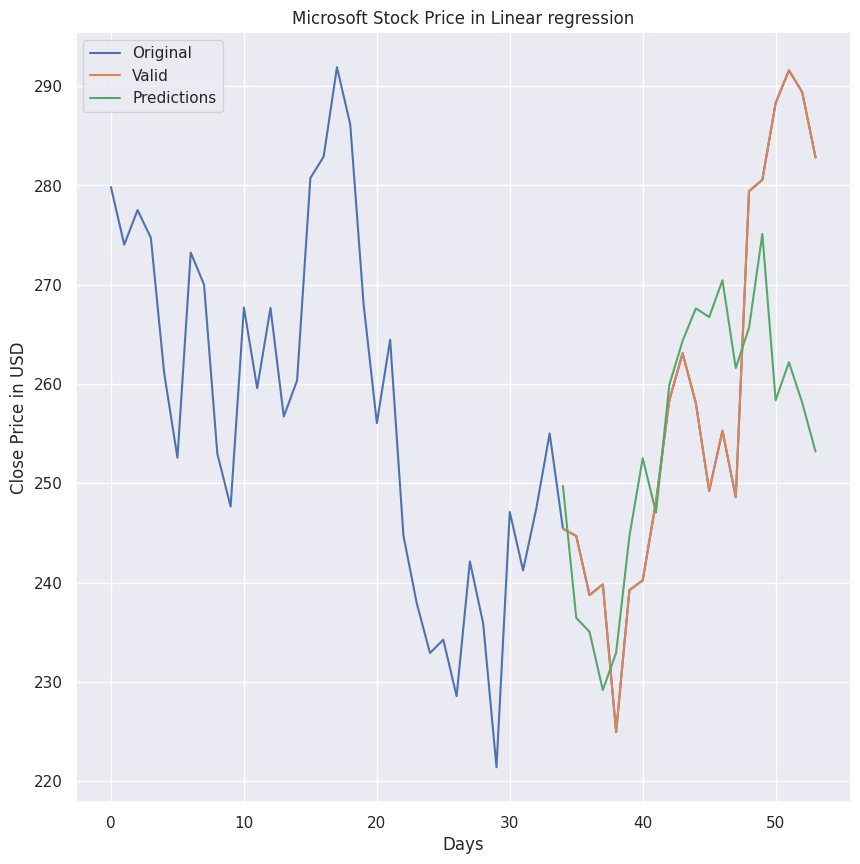

In [41]:
# let us plot the data for linear regression

predictions = linearPrediction
valid = Microsoft[a.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 10))
plt.title("Microsoft Stock Price in Linear regression")
plt.xlabel("Days")
plt.ylabel("Close Price in USD")
plt.plot(Microsoft["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()